# PREDICTING FOOD TRENDS (UNSUPERVISED LEARNING)


## Problem Statement
Identifying opportunities for growth. Increase market share.
As per external market research, the spices and savoury segment is registering immense growth within the food flavours market. This trend is largely driven by consumers' growing interest in multicultural cuisines and adventurous eating experiences.
(https://www.fortunebusinessinsights.com/food-flavors-market-102745).

The Asia Pacific Food Flavours Market Size is expected to have a steady increase up till 2028. Currently the market size stands at more than USD 5m.
(https://www.6wresearch.com/industry-report/malaysia-food-flavors-market).

'Increasing application of food flavours across the packaged food industry... will accelerate market growth...'.
'Various multinational giants are mainly focusing on the development of exotic and unique delicious food flavours, to attract a large number of comsumers towards food flavours. Strong demand for convenient food products will create growth opportunities for food flavouring industry.'
(https://www.gmiresearch.com/report/food-flavors-market/).

## STAKEHOLDERS/AUDIENCE

Executive Leadership: CEO, CFO, Top-level Executives, Product Development Dept, Sales Marketing Department, Research and Development(R&D), Supply Chain Procurement Team, Quality Assurance and Food Safety Team
    

## Data Source
Kaggle 


## SMART GOALS

### SPECIFIC
I plan to use classification model to identify popular food flavour trends

I will use unsupervised learning algorithm for classification. Such as Kmeans clustering to perform the grouping.
From the clusters, i will be analysing the most popular features from our dataset such as 'ratings', 'cuisine' and ingredients.

### MEASURABLE
To assess the model's performance and its ability to capture relevant trends in the data, the following metrics can be used:
Sihouette score

### ACHIEVABLE
I think that the project is appropriately scoped, not too large and not too small.

### RELEVANT
#### Product Innovation and Development: 
Understanding food flavor trends allows food companies to innovate and develop new products that align with consumer preferences.
By predicting upcoming flavor trends, companies can stay ahead of the curve and introduce novel products that resonate with consumers.

#### Market Differentiation and Competitive Advantage:
Companies that accurately anticipate and respond to flavor trends can differentiate themselves in the market and gain a competitive edge. By offering trendy flavors that appeal to consumers, companies can attract new customers and retain existing ones.

#### Supply Chain Optimization: 
Predicting flavor trends can also benefit the supply chain by helping companies optimize sourcing and procurement strategies. 
By anticipating demand for specific ingredients and flavors, companies can ensure adequate supply and minimize inventory costs.

#### Consumer Insights and Engagement: 
Analyzing flavor trends provides valuable insights into consumer preferences and behavior. By understanding which flavors are popular and why, companies can tailor their offerings to better meet consumer needs and preferences, ultimately enhancing customer satisfaction and loyalty.

#### Marketing and Branding Strategies: 
Food flavor trends can influence marketing and branding strategies, helping companies position their products effectively in the market. By leveraging popular flavors in advertising campaigns and product packaging, companies can enhance brand perception and appeal to target audiences.



### TIME-BOUND
Project Milestone

Week 1: 
Data Processing and EDA

Week 2: 
Build model and Model Evaluation

Week 3: 
Interpretation and Summary 


## Assumptions
1. My scope as an analyst is to analyse data and come out with findings/analysis. Further work will be carried out by the relevant departments.
2. Other scopes that contribute factors to market growth such as marketing strategy and pricing etc. will not be part of this project.
3. Higher ratings indicate popularity of ingredients in the recipe and its cuisine, which means people find it tasty.

In [9]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.ensemble import BaggingClassifier

from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
import string


from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Import CountVectorizer and TFIDFVectorizer from feature_extraction.text.
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import the CSV into a pandas DataFrame.
# Load recipe.csv into DataFrames.


In [10]:
recipe = pd.read_csv('recipe.csv', encoding='latin1')
recipe.head()

,id,recipeName,rating,totalTimeInSeconds,course,cuisine,ingredients
0,Southern-Cornbread-Dressing-1357820,Southern Cornbread Dressing,4.0,3600.0,Condiments and Sauces,Southern,"buttermilk cornbread, sandwich bread, salt, bl..."
1,Peanut-butter-fudge-297693,Peanut Butter Fudge,4.0,8100.0,Desserts,American,"Country Crock® Spread, light corn syrup, cream..."
2,Buckeyes-298471,Buckeyes,4.0,6600.0,Desserts,American,"Skippy® Super Chunk® Peanut Butter, Country Cr..."
3,Disappearing-buffalo-chicken-dip-297712,Disappearing Buffalo Chicken Dip,4.0,2100.0,Appetizers,American,"light mayonnaise, lemon juice, cayenne pepper ..."
4,Classic-macaroni-salad-304692,Classic Macaroni Salad,4.0,1500.0,"Salads, Side Dishes",American,"elbow macaroni, hellmann' or best food real ma..."


In [11]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5475 entries, 0 to 5474
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   id                  5475 non-null   object 
 1   recipeName          5475 non-null   object 
 2   rating              5474 non-null   float64
 3   totalTimeInSeconds  5240 non-null   float64
 4   course              5472 non-null   object 
 5   cuisine             5475 non-null   object 
 6   ingredients         5475 non-null   object 
dtypes: float64(2), object(5)
memory usage: 299.5+ KB


In [12]:
recipe.describe()

,rating,totalTimeInSeconds
count,5474.000000,5240.000000
mean,3.949763,3898.013359
std,0.770503,5761.176393
min,0.000000,60.000000
25%,4.000000,1560.000000
50%,4.000000,2700.000000
75%,4.000000,3900.000000
max,5.000000,88800.000000


In [13]:
#drop column 'id', 'recipeName','totalTimeInSeconds','course'
recipe.drop(['id', 'recipeName','totalTimeInSeconds','course'], axis=1, inplace=True)
#recipe 

In [14]:
recipe.dropna(inplace=True)


In [15]:
#Drop nulls
recipe.dropna(inplace=True)

In [16]:
#check whether still got nulls
recipe.isnull().sum()

rating         0
cuisine        0
ingredients    0
dtype: int64

## DATASET CLEANING & PRE-PROCESSING

In [17]:
# Tokenization. We will split the texts into individual words or tokens

# Tokenization function
def tokenize_text(text):
    tokens = word_tokenize(text)
    return tokens

# Apply tokenization to the 'ingredients' column
recipe['tokenized_ingredients'] = recipe['ingredients'].apply(tokenize_text)
recipe.head()

,rating,cuisine,ingredients,tokenized_ingredients
0,4.0,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,..."
1,4.0,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru..."
2,4.0,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co..."
3,4.0,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn..."
4,4.0,American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo..."


In [18]:
# Lowercasing
# Define the function to convert tokenized words to lowercase
def lowercase_tokens(tokens):
    return [token.lower() for token in tokens]

# Apply the lowercase_tokens function to the 'tokenized_ingredients' column
recipe['lowercase_ingredients'] = recipe['tokenized_ingredients'].apply(lowercase_tokens)

In [19]:
#Remove punctuation
# Function to remove punctuation from tokenized words
def remove_punctuation(tokens):
    no_punctuation_ingredients = [token for token in tokens if token not in string.punctuation]
    return no_punctuation_ingredients
    
recipe['no_punctuation_ingredients'] = recipe['lowercase_ingredients'].apply(remove_punctuation)
recipe

,rating,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients
0,4.0,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,4.0,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ..."
2,4.0,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count..."
3,4.0,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep..."
4,4.0,American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re..."
...,...,...,...,...,...,...
5469,4.0,Japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa..."
5470,4.0,Japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni..."
5471,4.0,Japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,..."
5472,4.0,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, sake, soy, sauce, ginger, pota..."


In [20]:
# Removing Stopwords
# Function to remove stop words from tokenized words
def remove_stopwords(tokens):
    stop_words = set(stopwords.words('english'))
    no_stopwords_ingredients = [token for token in tokens if token.lower() not in stop_words]
    return no_stopwords_ingredients

# Remove stop words from tokenized words
recipe['no_stopwords_ingredients'] = recipe['no_punctuation_ingredients'].apply(remove_stopwords)
recipe

,rating,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients
0,4.0,Southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,4.0,American,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ..."
2,4.0,American,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,4.0,American,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep..."
4,4.0,American,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...
5469,4.0,Japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa..."
5470,4.0,Japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni..."
5471,4.0,Japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,..."
5472,4.0,Japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, sake, soy, sauce, ginger, pota...","[chicken, legs, sake, soy, sauce, ginger, pota..."


## Lemmatization


In [22]:
# Lemmatization function
def lemmatize_tokens(tokens):
    lemmatizer = WordNetLemmatizer()
    lemmatized_ingredients = [lemmatizer.lemmatize(token) for token in tokens]
    return lemmatized_ingredients

In [23]:
# Lemmatize the filtered tokens
recipe['lemmatized_ingredients'] = recipe['no_stopwords_ingredients'].apply(lemmatize_tokens)

In [24]:
#We will go with lemmatizing as the words we need are mainly nouns, without prefixes or suffixes.
recipe.loc[:,'lemmatized_ingredients']


0       [buttermilk, cornbread, sandwich, bread, salt,...
1       [country, crock®, spread, light, corn, syrup, ...
2       [skippy®, super, chunk®, peanut, butter, count...
3       [light, mayonnaise, lemon, juice, cayenne, pep...
4       [elbow, macaroni, hellmann, best, food, real, ...
                              ...                        
5469    [chicken, thigh, light, soy, sauce, mirin, sak...
5470    [dashi, miso, silken, tofu, wakame, green, oni...
5471    [pork, cutlet, white, miso, red, miso, fresh, ...
5472    [chicken, leg, sake, soy, sauce, ginger, potat...
5473    [green, onion, fresh, lemon, juice, mirin, low...
Name: lemmatized_ingredients, Length: 5474, dtype: object

## CREATING A NEW DICTIONARY

In [25]:
# Create a new dictionary to store cleaned and lemmatized data
cleaned_ingredients_dict = {}

# Iterate over each row in the DataFrame
for index, row in recipe.iterrows():
    cleaned_ingredients = row['lemmatized_ingredients']  # Assuming 'lemmatized_ingredients' is the column containing cleaned and lemmatized tokens
    cleaned_ingredients_dict[index] = cleaned_ingredients


In [26]:
cleaned_ingredients_dict

{0: ['buttermilk',
  'cornbread',
  'sandwich',
  'bread',
  'salt',
  'black',
  'pepper',
  'rubbed',
  'sage',
  'egg',
  'onion',
  'celery',
  'butter',
  'cream',
  'chicken',
  'soup',
  'chicken',
  'stock'],
 1: ['country',
  'crock®',
  'spread',
  'light',
  'corn',
  'syrup',
  'creamy',
  'peanut',
  'butter',
  'confectioner',
  'sugar',
  'vanilla',
  'extract'],
 2: ['skippy®',
  'super',
  'chunk®',
  'peanut',
  'butter',
  'country',
  'crock®',
  'spread',
  'confectioner',
  'sugar',
  'semi-sweet',
  'chocolate',
  'morsel'],
 3: ['light',
  'mayonnaise',
  'lemon',
  'juice',
  'cayenne',
  'pepper',
  'sauce',
  'blue',
  'cheese',
  'chive',
  'shredded',
  'cheddar',
  'cheese',
  'cooked',
  'chicken'],
 4: ['elbow',
  'macaroni',
  'hellmann',
  'best',
  'food',
  'real',
  'mayonnais',
  'red',
  'vinegar',
  'white',
  'white',
  'wine',
  'hellmann',
  "'s",
  'dijonnaise',
  'creamy',
  'dijon',
  'mustard',
  'sugar',
  'salt',
  'ground',
  'black',
 

## CLUSTERING & GROUPING OF INGREDIENTS

## VECTORIZATION Using TF-IDF, to represent each ingredient as a high-dimensional vector.
## To convert pre-processed text data into numerical vectors

In [27]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Convert the dictionary into a list of documents
documents = [' '.join(tokens) for tokens in cleaned_ingredients_dict.values()]

# Create TF-IDF vectorizer, instantiate.
tvec = TfidfVectorizer()

# Fit-transform the data to create TF-IDF vectors
tvec = tvec.fit_transform(documents)

In [28]:
documents

['buttermilk cornbread sandwich bread salt black pepper rubbed sage egg onion celery butter cream chicken soup chicken stock',
 'country crock® spread light corn syrup creamy peanut butter confectioner sugar vanilla extract',
 'skippy® super chunk® peanut butter country crock® spread confectioner sugar semi-sweet chocolate morsel',
 'light mayonnaise lemon juice cayenne pepper sauce blue cheese chive shredded cheddar cheese cooked chicken',
 "elbow macaroni hellmann best food real mayonnais red vinegar white white wine hellmann 's dijonnaise creamy dijon mustard sugar salt ground black pepper celery green bell pepper slice onion",
 'hellmann best food real mayonnais lemon juice sugar salt cabbage carrot green bell pepper',
 '2 reduced-fat milk unsalted butter purpose unbleached flour fine sea salt ground black pepper grated nutmeg',
 'skippy creamy peanut butter sugar cream cheese frozen whipped topping hot fudge topping 9 inch chocolate crumb crust',
 'pie crust egg light corn syrup b

In [29]:
tvec

<5474x1662 sparse matrix of type '<class 'numpy.float64'>'
	with 95710 stored elements in Compressed Sparse Row format>

In [30]:
# Convert the sparse matrix to a dense array
dense_tvec = tvec.toarray()

# Display the dense array
print(dense_tvec)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


## Convert 'rating' to an array

In [31]:
#Convert 'rating' to array
rating_array = np.array(recipe['rating'])

In [32]:
rating_array

array([4., 4., 4., ..., 4., 4., 4.])

## Cleaning of 'cuisine' column in 'recipe' dataframe

In [33]:
recipe['cuisine'] = recipe['cuisine'].str.strip()

In [34]:
# Convert 'cuisine' column to lowercase
recipe['cuisine'] = recipe['cuisine'].str.lower()


In [35]:
#Removing punctuations
#recipe['cuisine'] = recipe['cuisine'].str.replace(r'[^\w\s]+', '')
recipe


,rating,cuisine,ingredients,tokenized_ingredients,lowercase_ingredients,no_punctuation_ingredients,no_stopwords_ingredients,lemmatized_ingredients
0,4.0,southern,"buttermilk cornbread, sandwich bread, salt, bl...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, ,, sandwich, bread, ,,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,...","[buttermilk, cornbread, sandwich, bread, salt,..."
1,4.0,american,"Country Crock® Spread, light corn syrup, cream...","[Country, Crock®, Spread, ,, light, corn, syru...","[country, crock®, spread, ,, light, corn, syru...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ...","[country, crock®, spread, light, corn, syrup, ..."
2,4.0,american,"Skippy® Super Chunk® Peanut Butter, Country Cr...","[Skippy®, Super, Chunk®, Peanut, Butter, ,, Co...","[skippy®, super, chunk®, peanut, butter, ,, co...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count...","[skippy®, super, chunk®, peanut, butter, count..."
3,4.0,american,"light mayonnaise, lemon juice, cayenne pepper ...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, ,, lemon, juice, ,, cayenn...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep...","[light, mayonnaise, lemon, juice, cayenne, pep..."
4,4.0,american,"elbow macaroni, hellmann' or best food real ma...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, ,, hellmann, ', or, best, fo...","[elbow, macaroni, hellmann, or, best, food, re...","[elbow, macaroni, hellmann, best, food, real, ...","[elbow, macaroni, hellmann, best, food, real, ..."
...,...,...,...,...,...,...,...,...
5469,4.0,japanese,"chicken thighs, light soy sauce, mirin, sake, ...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, ,, light, soy, sauce, ,, mir...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thighs, light, soy, sauce, mirin, sa...","[chicken, thigh, light, soy, sauce, mirin, sak..."
5470,4.0,japanese,"dashi, miso, silken tofu, wakame, green onions...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, ,, miso, ,, silken, tofu, ,, wakame, ,...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni...","[dashi, miso, silken, tofu, wakame, green, oni..."
5471,4.0,japanese,"pork cutlets, white miso, red miso, fresh ging...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, ,, white, miso, ,, red, miso, ...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlets, white, miso, red, miso, fresh,...","[pork, cutlet, white, miso, red, miso, fresh, ..."
5472,4.0,japanese,"chicken legs, sake, soy sauce, ginger, potato ...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, ,, sake, ,, soy, sauce, ,, gin...","[chicken, legs, sake, soy, sauce, ginger, pota...","[chicken, legs, sake, soy, sauce, ginger, pota...","[chicken, leg, sake, soy, sauce, ginger, potat..."


In [49]:
cuisine_categories = recipe['cuisine'].unique()
num_cuisines = len(cuisine_categories)

In [50]:
num_cuisines

21

In [51]:
#types of unique cuisines
cuisine_categories = recipe['cuisine'].unique()
cuisine_categories

array(['southern', 'american', 'french', 'mexican', 'asian', 'cajun',
       'cuban', 'spanish', 'irish', 'italian', 'barbecue',
       'mediterranean', 'hawaiian', 'chinese', 'japanese', 'thai',
       'indian', 'greek', 'english', 'german', 'hungarian'], dtype=object)

In [52]:
# to convert unique cuisine categories to binary with one-hot encode
# Initialize an empty list to store one-hot encoded cuisine features
encoded_cuisine = []

# Iterate over each cuisine category
for cuisine in recipe['cuisine']:
    # Initialize a binary vector for each cuisine category
    one_hot_vector = [0] * num_cuisines
    # Find the index of the current cuisine category
    index = np.where(cuisine_categories == cuisine)[0][0]
    # Set the corresponding element in the one-hot vector to 1
    one_hot_vector[index] = 1
    # Append the one-hot vector to the list of encoded cuisine features
    encoded_cuisine.append(one_hot_vector)

In [53]:
encoded_cuisine

[[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 1, 0,

In [54]:
#Now that our arrays are ready, lets concatenate them in a single feature matrix
#dense_tvec, rating array and encoded_cusine
# Concatenate the three arrays
feature_matrix = np.concatenate((dense_tvec, rating_array.reshape(-1, 1), encoded_cuisine), axis=1)
feature_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Apply clustering algorithm to our feature matrix to group similar ingredients, rating and cuisine




## Elbow Method used to determine optimal number of clusters

C:\Users\Alexandria Low\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alexandria Low\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alexandria Low\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alexandria Low\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\Alexandria 

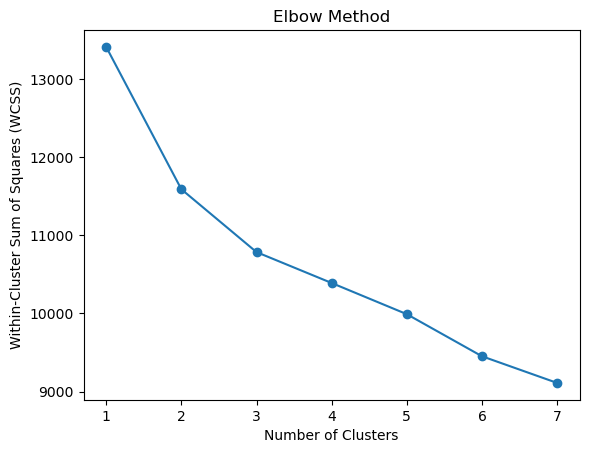

In [44]:
from sklearn.cluster import KMeans

# Initialize a list to store the within-cluster sum of squares (WCSS)
wcss = []

# Define a range of cluster numbers to try
max_clusters = 7  # Maximum number of clusters to try
for num_clusters in range(1, max_clusters + 1):
    # Fit KMeans model for the current number of clusters
    kmeans = KMeans(n_clusters=num_clusters, random_state=42)
    kmeans.fit(feature_matrix)
    
    # Calculate WCSS and append to the list
    wcss.append(kmeans.inertia_)

# Plot the number of clusters vs. WCSS
plt.plot(range(1, max_clusters + 1), wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.show()

In [47]:
#Apply KMeans
num_clusters = 3 

# Fit KMeans model and get cluster labels
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(feature_matrix)

C:\Users\Alexandria Low\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [56]:
#Compute Centroids
centroids = kmeans.cluster_centers_

In [60]:
# Perform PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(feature_matrix)


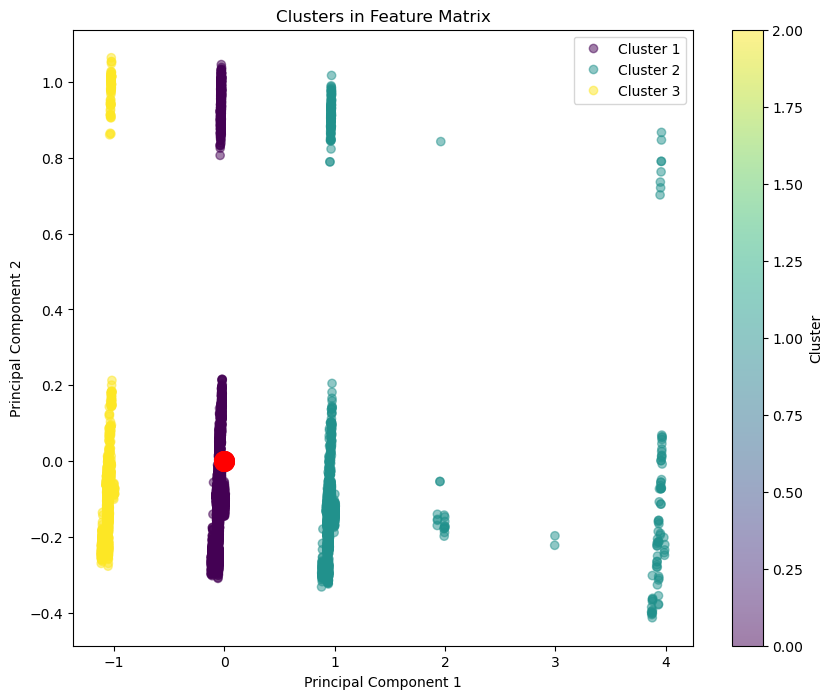

In [75]:
# Create a dictionary to map cluster labels to legend labels
cluster_legend_mapping = {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3'}  # Add more mappings if needed

plt.figure(figsize=(10, 8))
scatter = plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=cluster_labels, cmap='viridis', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], marker='o', s=200, c='red', label='Centroids')

# Create legend handles
legend_handles = []
for cluster_label, legend_label in cluster_legend_mapping.items():
    legend_handles.append(scatter.legend_elements()[0][cluster_label])
    
# Plot legend
plt.legend(legend_handles, cluster_legend_mapping.values(), loc='upper right')

plt.title('Clusters in Feature Matrix')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label='Cluster')
plt.show()

In [74]:
# Calculate the average rating for each cluster
cluster_ratings = []
for cluster in np.unique(kmeans.labels_):
    cluster_indices = np.where(kmeans.labels_ == cluster)[0]
    cluster_avg_rating = np.mean(rating_array[cluster_indices])
    cluster_ratings.append(cluster_avg_rating)

# Display the average rating for each cluster
for i, avg_rating in enumerate(cluster_ratings):
    print(f"Cluster {i+1}: Average Rating = {avg_rating:.2f}")

Cluster 1: Average Rating = 4.00
Cluster 2: Average Rating = 2.75
Cluster 3: Average Rating = 5.00


In [150]:
top_cuisines_per_cluster = []

for i in range(3):  # Assuming there are 3 clusters
    cluster_top_cuisines = []  # List to store top cuisines for this cluster
    for j in range(10):  # Select top 10 cuisines
        cuisine_index = np.argsort(cluster_cuisine_word_frequencies[i])[::-1][j]
        cuisine_name = cuisine_categories[cuisine_index]
        cluster_top_cuisines.append(f"Cluster {i+1} - Word {j+1}: {cuisine_name} - {cluster_cuisine_word_frequencies[i][cuisine_index]}")
    top_cuisines_per_cluster.append(cluster_top_cuisines)
top_cuisines_per_cluster

[['Cluster 1 - Word 1: asian - 430',
  'Cluster 1 - Word 2: cajun - 336',
  'Cluster 1 - Word 3: greek - 331',
  'Cluster 1 - Word 4: italian - 312',
  'Cluster 1 - Word 5: american - 289',
  'Cluster 1 - Word 6: indian - 256',
  'Cluster 1 - Word 7: french - 236',
  'Cluster 1 - Word 8: chinese - 198',
  'Cluster 1 - Word 9: hungarian - 183',
  'Cluster 1 - Word 10: german - 165'],
 ['Cluster 2 - Word 1: hungarian - 140',
  'Cluster 2 - Word 2: asian - 115',
  'Cluster 2 - Word 3: cajun - 90',
  'Cluster 2 - Word 4: indian - 84',
  'Cluster 2 - Word 5: greek - 83',
  'Cluster 2 - Word 6: italian - 71',
  'Cluster 2 - Word 7: french - 65',
  'Cluster 2 - Word 8: chinese - 58',
  'Cluster 2 - Word 9: american - 55',
  'Cluster 2 - Word 10: cuban - 54'],
 ['Cluster 3 - Word 1: american - 222',
  'Cluster 3 - Word 2: french - 88',
  'Cluster 3 - Word 3: italian - 80',
  'Cluster 3 - Word 4: cajun - 77',
  'Cluster 3 - Word 5: greek - 74',
  'Cluster 3 - Word 6: asian - 74',
  'Cluster 3 -

In [101]:
# Print the top 10 frequency words for each cluster
for i in range(3):  # Assuming there are 3 clusters
    print(f"Cluster {i+1} Cuisine Word Frequencies:")
    # Sort word frequencies and select top 10 words
    top_indices = np.argsort(cluster_cuisine_word_frequencies[i])[::-1][:10]
    # Map top indices to cuisine names and print
    for j, index in enumerate(top_indices):
        cuisine_name = cuisine_categories[index]  # Map index to cuisine name
        count = cluster_cuisine_word_frequencies[i][index]
        print(f"Word {j+1}: {cuisine_name} - {count}")
    print()

Cluster 1 Cuisine Word Frequencies:
Word 1: asian - 430
Word 2: cajun - 336
Word 3: greek - 331
Word 4: italian - 312
Word 5: american - 289
Word 6: indian - 256
Word 7: french - 236
Word 8: chinese - 198
Word 9: hungarian - 183
Word 10: german - 165

Cluster 2 Cuisine Word Frequencies:
Word 1: hungarian - 140
Word 2: asian - 115
Word 3: cajun - 90
Word 4: indian - 84
Word 5: greek - 83
Word 6: italian - 71
Word 7: french - 65
Word 8: chinese - 58
Word 9: american - 55
Word 10: cuban - 54

Cluster 3 Cuisine Word Frequencies:
Word 1: american - 222
Word 2: french - 88
Word 3: italian - 80
Word 4: cajun - 77
Word 5: greek - 74
Word 6: asian - 74
Word 7: german - 72
Word 8: irish - 61
Word 9: cuban - 47
Word 10: chinese - 35



In [92]:
# Print frequency of unique words in dense_tvec for each cluster
for i, freq in enumerate(cluster_ingredient_word_frequencies):
    print(f"Cluster {i+1} Ingredient Word Frequencies:")
    # Sort word frequencies and select top 10 words
    top_indices = np.argsort(freq)[::-1][:10]
    # Map top indices to ingredient words and print
    for j, index in enumerate(top_indices):
        ingredient_word = cleaned_ingredients_dict[index]  # Map index to ingredient word
        print(f"Word {j+1}: {ingredient_word} - Frequency: {freq[index]}")
    print()

Cluster 1 Ingredient Word Frequencies:
Word 1: ['thai', 'noodle', 'vegetable', 'oil', 'minced', 'garlic', 'sweet', 'paprika', 'fish', 'sauce', 'white', 'vinegar', 'sugar', 'oil', 'leek', 'tofu', 'egg', 'scallion', 'beansprouts', 'peanut', 'lime'] - Frequency: 236.93001171072282
Word 2: ['red', 'bell', 'pepper', 'olive', 'oil', 'mushroom', 'ginger', 'garlic', 'lemon', 'grass', 'sambal', 'ulek', 'chicken', 'broth', 'coconut', 'milk', 'sugar', 'soy', 'sauce'] - Frequency: 198.7033928585591
Word 3: ['chicken', 'liver', 'dark', 'soy', 'sauce', 'mirin', 'sake', 'brown', 'sugar', 'garlic', 'clove', 'fresh', 'ginger', 'scallion'] - Frequency: 197.44324108953833
Word 4: ['fresh', 'corn', 'pepper', 'butter', 'salt'] - Frequency: 191.02321731322425
Word 5: ['sushi', 'rice', 'avocado', 'crabmeat', 'seed', 'nori', 'toasted', 'sesame', 'seed', 'wasabi', 'soy', 'sauce'] - Frequency: 181.79256239015177
Word 6: ['water', 'white', 'sugar', 'grated', 'lemon', 'zest', 'lemon', 'juice', 'strawberry', 'carb

In [148]:
# Initialize lists to store cuisine data
cuisine_cluster_numbers = []
cuisine_word_numbers = []
cuisine_names = []
cuisine_frequencies = []

# Iterate over each cluster for cuisines
for i in range(3):  # Assuming there are 3 clusters
    # Sort word frequencies and select top 10 words
    top_indices = np.argsort(cluster_cuisine_word_frequencies[i])[::-1][:10]
    # Map top indices to cuisine names and frequencies and append data to lists
    for j, index in enumerate(top_indices):
        cuisine_cluster_numbers.append(i + 1)
        cuisine_word_numbers.append(j + 1)
        cuisine_name = cuisine_categories[index]
        cuisine_names.append(cuisine_name)  # Append cuisine name
        cuisine_frequencies.append(cluster_cuisine_word_frequencies[i][index])

# Create DataFrame for cuisines
cuisine_data = {
    'Cluster': cuisine_cluster_numbers,
    'Word': cuisine_word_numbers,
    'Cuisine': cuisine_names,
    'Frequency_cuisines': cuisine_frequencies
}
cuisine_df = pd.DataFrame(cuisine_data)

# Merge the cuisine DataFrame with the existing DataFrame on 'Cluster' column
merged_df = pd.merge(df, cuisine_df, on='Cluster')

# Add average rating column back to the DataFrame
merged_df['Average Rating'] = merged_df['Cluster'].map(average_ratings)

# Display the merged DataFrame
print(merged_df)
merged_df

     Cluster  Word_x                                         Ingredient  \
0          1       1  [thai, noodle, vegetable, oil, minced, garlic,...   
1          1       1  [thai, noodle, vegetable, oil, minced, garlic,...   
2          1       1  [thai, noodle, vegetable, oil, minced, garlic,...   
3          1       1  [thai, noodle, vegetable, oil, minced, garlic,...   
4          1       1  [thai, noodle, vegetable, oil, minced, garlic,...   
..       ...     ...                                                ...   
295        3      10  [filet, mignon, black, truffle, oil, salt, fre...   
296        3      10  [filet, mignon, black, truffle, oil, salt, fre...   
297        3      10  [filet, mignon, black, truffle, oil, salt, fre...   
298        3      10  [filet, mignon, black, truffle, oil, salt, fre...   
299        3      10  [filet, mignon, black, truffle, oil, salt, fre...   

      Frequency  Word_y   Cuisine  Frequency_cuisines  Average Rating  
0    236.930012       1    

,Cluster,Word_x,Ingredient,Frequency,Word_y,Cuisine,Frequency_cuisines,Average Rating
0,1,1,"[thai, noodle, vegetable, oil, minced, garlic,...",236.930012,1,asian,430,4.0
1,1,1,"[thai, noodle, vegetable, oil, minced, garlic,...",236.930012,2,cajun,336,4.0
2,1,1,"[thai, noodle, vegetable, oil, minced, garlic,...",236.930012,3,greek,331,4.0
3,1,1,"[thai, noodle, vegetable, oil, minced, garlic,...",236.930012,4,italian,312,4.0
4,1,1,"[thai, noodle, vegetable, oil, minced, garlic,...",236.930012,5,american,289,4.0
...,...,...,...,...,...,...,...,...
295,3,10,"[filet, mignon, black, truffle, oil, salt, fre...",41.421073,6,asian,74,5.0
296,3,10,"[filet, mignon, black, truffle, oil, salt, fre...",41.421073,7,german,72,5.0
297,3,10,"[filet, mignon, black, truffle, oil, salt, fre...",41.421073,8,irish,61,5.0
298,3,10,"[filet, mignon, black, truffle, oil, salt, fre...",41.421073,9,cuban,47,5.0


## Model Evaluation
## Sihoutte Score

In [116]:
#Calculate the silhouette score. Based on the dense TF-IDF vector.
from sklearn.metrics import silhouette_score

# Compute the silhouette score
silhouette_avg = silhouette_score(feature_matrix, cluster_labels)
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.10873516365044253


In [174]:
print("The silhouette score of the K-Means clustering:", silhouette_avg)


The silhouette score of the K-Means clustering: 0.10873516365044253


### The Silhouette score of 0.10873516365044253 is in a positive value. However, the underlying reasons for the low score should be analysed.